# Big Three Anime Analysis

### Import required modules for scrapping, reading and writing csv files

In [1]:
import requests
import csv
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

### Web Scraping and Write CSV files using Python

In [2]:
def scrap(anime):
    #copy the url, and ask your which among the big three he want to analyse
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    url = requests.get("https://listfist.com/list-of-{}-arcs".format(anime.replace(' ','-')),headers=headers)
    #scrap and find the table tag, by inspecting ListFist website
    soup = BeautifulSoup(url.content,'html.parser')
    arc_names = soup.findAll('td',class_="col-2 even")
    arc_total_episodes = soup.findAll('td',class_="col-8 even")
    
    #write the scrapped data into .csv files
    rows = zip([i.text for i in arc_names],[j.text for j in arc_total_episodes])
    with open("{}_analysis.csv".format(anime.replace(' ','_')), "wt+", newline="") as file:
        writer = csv.writer(file)
        #the columns and first row of the dataset
        writer.writerow(["Arc names","Total Episodes"])
        for row in rows:
            writer.writerow(row)
        
    file.close()

### User Input

In [3]:
def name():
    #make sure user enters only Big Three Anime names
    bigthree = ['one piece','naruto','bleach']
    while True:
        your_choice = input("Which anime from Big three you want to analysis:").lower()
        if your_choice not in bigthree:
            print('Only enter from these 3: {}'.format(' '.join(bigthree)))
            continue
        else:
            bigthree_analyis = scrap(your_choice)
            break
            
    return your_choice

In [4]:
anime_name = name()
anaylsis_data = "{}_analysis.csv".format(anime_name.replace(" ","_"))

Which anime from Big three you want to analysis:bleach


### Read CSV

In [17]:
dataset = pd.read_csv(anaylsis_data)
df = pd.DataFrame(dataset)

In [18]:
df.head(10)

,Arc names,Total Episodes
0,Agent of the Shinigami Arc,20
1,Soul Society: The Sneak Entry Arc,21
2,Soul Society: The Rescue Arc,22
3,The Bount Arc,28
4,Bount Assault on Soul Society Arc,18
5,Arrancar: The Arrival Arc,22
6,Arrancar: The Hueco Mundo Sneak Entry Arc,20
7,Arrancar: The Fierce Fight Arc,16
8,The New Captain Shūsuke Amagai Arc,22
9,Arrancar vs. Shinigami Arc,16


### Check Arc With Maximum and Minimum Episodes

In [21]:
arc_max = df[df["Total Episodes"]==df['Total Episodes'].max()]
print("Biggest Arc \n {}".format(arc_max))
arc_min = df[df["Total Episodes"]==df['Total Episodes'].min()]
print("Smallest Arc \n {}".format(arc_min))

Biggest Arc 
                  Arc names  Total Episodes
13  Arrancar: Downfall Arc              51
Smallest Arc 
                        Arc names  Total Episodes
16  The 1,000 Year Blood War Arc               0


### Drop Those Arc, which as less than 8 episodes [TO make a proper graph]

In [22]:
for i in range(len(df['Total Episodes'])):
    if df['Total Episodes'][i]<=8:
        df.drop(i,inplace=True)

In [23]:
df

,Arc names,Total Episodes
0,Agent of the Shinigami Arc,20
1,Soul Society: The Sneak Entry Arc,21
2,Soul Society: The Rescue Arc,22
3,The Bount Arc,28
4,Bount Assault on Soul Society Arc,18
5,Arrancar: The Arrival Arc,22
6,Arrancar: The Hueco Mundo Sneak Entry Arc,20
7,Arrancar: The Fierce Fight Arc,16
8,The New Captain Shūsuke Amagai Arc,22
9,Arrancar vs. Shinigami Arc,16


### Pie Graph

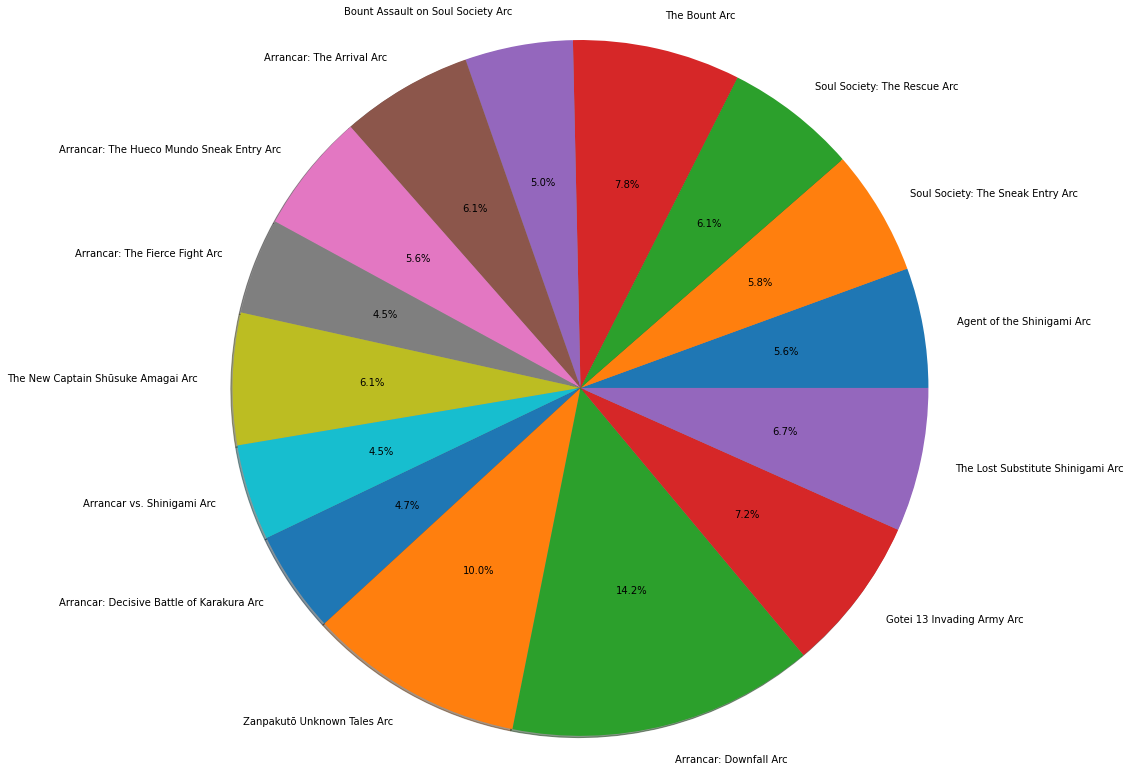

In [25]:
episode = df.iloc[:,-1].values
arc = df.iloc[:,0].values

plt.pie(episode, labels = arc,shadow = True,radius=4,autopct='%1.1f%%')
plt.savefig("{}_pie_graph.png".format(anime_name),transparent=False,bbox_inches="tight",pad_inches=0.3)
plt.show() 

### Bar Graph

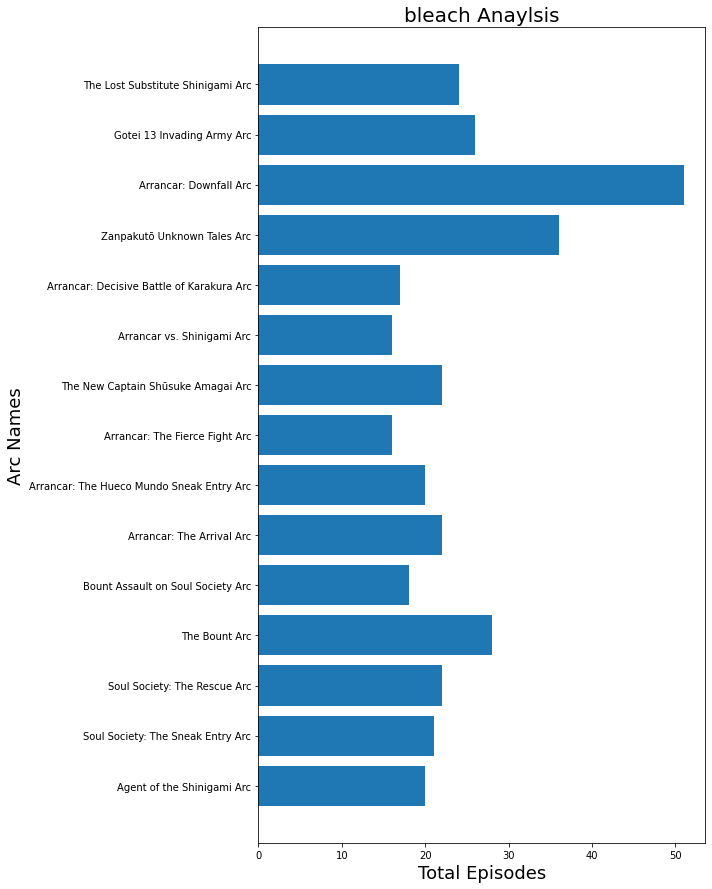

In [26]:
plt.figure(figsize=(8,15))
plt.barh(arc,episode)
plt.xlabel("Total Episodes",fontsize=18)
plt.ylabel("Arc Names",fontsize=18)
plt.title("{} Anaylsis".format(anime_name),fontsize=20)
plt.savefig("{}_bar_graph.png".format(anime_name),transparent=False,bbox_inches="tight",pad_inches=0.3)
plt.show()

## Support Anime Vyuh
### Artcile Link:
[The Big Three Analysis](https://animevyuh.org/the-big-three-anime/)
<br>
[Support: Buy me a Coffee](https://www.buymeacoffee.com/trjtarun)